In [1]:
import sklearn
print(sklearn.__version__)


1.5.1


# Used Car Price Prediction

## End to End Machine Learning Project

## 1. Understanding Problem Statement

**Problem Statement:**

The used car market in India is highly dynamic, with prices varying widely due to factors such as the car's make and model, mileage, condition, and current market trends. This variability often makes it challenging for sellers to determine accurate pricing for their vehicles.

**Objective:**

To develop a machine learning model capable of predicting the price of a used car based on its features.

**Proposed Approach:**

We aim to create a machine learning model trained on a dataset of used cars sold on Cardekho.com in India. This model will use car-specific features to predict prices accurately, enabling sellers and buyers to make informed decisions.

#### Benefits:

**Accurate Pricing for Sellers**: Sellers can set realistic prices, helping them sell their cars faster and achieve better returns.

**Competitive Pricing for Buyers**: Buyers will have access to fairly priced options, enhancing their purchasing experience.

**Market Efficiency**: The overall efficiency of the Indian used car market will improve with standardized pricing predictions.

## Import Data and Required Packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


## Download and Import the CSV Data as Pandas DataFrame

In [13]:
df = pd.read_csv("C:\\Users\\steph\\Downloads\\cardekho_dataset.csv",index_col=[0])
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


##  Understanding the Data and Data Description

In [15]:
#To get the insights of top 5 rows and columns
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [17]:
#To get the insights of bottom 5 rows and columns
df.tail()


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [20]:
#To know the columns in the dataframe
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [22]:
print('The size of the DataFrame :', df.shape)

The size of the DataFrame : (15411, 13)


In [23]:
print('COLUMN NAME,RECORD COUNT AND DATATYPES ARE AS FOLLOWS:')
df.info()

COLUMN NAME,RECORD COUNT AND DATATYPES ARE AS FOLLOWS:
<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [24]:
#To get insights of the datatypes in the dataframe
df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [28]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
df.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


## Defining Numerical and Categorical Columns

In [31]:
num_df = df.select_dtypes(include="number")
cat_df = df.select_dtypes(include="object_")
num_df

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
0,9,120000,19.70,796,46.30,5,120000
1,5,20000,18.90,1197,82.00,5,550000
2,11,60000,17.00,1197,80.00,5,215000
3,9,37000,20.92,998,67.10,5,226000
4,6,30000,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...
19537,9,10723,19.81,1086,68.05,5,250000
19540,2,18000,17.50,1373,91.10,7,925000
19541,6,67000,21.14,1498,103.52,5,425000
19542,5,3800000,16.00,2179,140.00,7,1225000


In [32]:
cat_df

,car_name,brand,model,seller_type,fuel_type,transmission_type
0,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
1,Hyundai Grand,Hyundai,Grand,Individual,Petrol,Manual
2,Hyundai i20,Hyundai,i20,Individual,Petrol,Manual
3,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
4,Ford Ecosport,Ford,Ecosport,Dealer,Diesel,Manual
...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,Dealer,Petrol,Manual
19540,Maruti Ertiga,Maruti,Ertiga,Dealer,Petrol,Manual
19541,Skoda Rapid,Skoda,Rapid,Dealer,Diesel,Manual
19542,Mahindra XUV500,Mahindra,XUV500,Dealer,Diesel,Manual


In [35]:
print(f'We have {len(num_df.columns)} numerical columns:', num_df.columns.tolist())
print(f'We have {len(cat_df.columns)} categorical columns:', cat_df.columns.tolist())


We have 7 numerical columns: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 categorical columns: ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


### Data Decritption(Feature Information)
* ___car_name___: Car's Full name, which includes brand and specific model name.
* ___brand___: Brand Name of the particular car.
* ___model___: Exact model name of the car of a particular brand.
* ___seller_type___: Which Type of seller is selling the used car
* ___fuel_type___: Fuel used in the used car, which was put up on sale.
* ___transmission_type___: Transmission used in the used car, which was put on sale.
* ___vehicle_age___: The count of years since car was bought.
* ___mileage___: It is the number of kilometer the car runs per litre.
* ___engine___: It is the engine capacity in cc(cubic centimeters)
* ___max_power___: Max power it produces in BHP.
* ___seats___: Total number of seats in car.
* ___selling_price___: The sale price which was put up on website.

In [38]:
print('Missing Value Presence in different columns of DataFrame are as follows: ')
print('-'*100)
total = df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count()*100)
pd.concat([total,percent], axis=1, keys=['Total','Percent'])

Missing Value Presence in different columns of DataFrame are as follows: 
----------------------------------------------------------------------------------------------------


,Total,Percent
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0


After inspecting the dataframe, **no missing values** found.



### Update Seats Where It Is 0


In [42]:
# Update seats where it is 0
df.loc[df["seats"] == 0, "seats"] = 5

In [44]:
# Display only car_name and seats for the specific cars
print(df.loc[df["car_name"].isin(["Nissan Kicks"]), ["car_name", "seats"]])
print(df.loc[df["car_name"].isin(["Honda City"]), ["car_name", "seats"]])


           car_name  seats
1618   Nissan Kicks      5
3170   Nissan Kicks      5
3961   Nissan Kicks      5
6266   Nissan Kicks      5
12365  Nissan Kicks      5
15992  Nissan Kicks      5
16701  Nissan Kicks      5
18102  Nissan Kicks      5
         car_name  seats
29     Honda City      5
33     Honda City      5
46     Honda City      5
90     Honda City      5
102    Honda City      5
...           ...    ...
19435  Honda City      5
19440  Honda City      5
19492  Honda City      5
19514  Honda City      5
19543  Honda City      5

[757 rows x 2 columns]


## Unique Categories

In [46]:
print('-'*125)
print('Checking records for mis-spell, typo-error etc')
print('-'*125)

print("'car_name' variable have {} unique_category : \n{}\n".format(df['car_name'].nunique(), df['car_name'].unique()))
print('-'*125)

print("'brand' variable have {} unique_category : \n{}\n".format(df['brand'].nunique(), df['brand'].unique()))
print('-'*125)

print("'model' variable have {} unique_category : \n{}\n".format(df['model'].nunique(), df['model'].unique()))
print('-'*125)

print("'seller_type' variable have {} unique_category : \n{}\n".format(df['seller_type'].nunique(),df['seller_type'].unique()))
print('-'*125)

print("'fuel_type' variable have {} unique_category : \n{}\n".format(df['fuel_type'].nunique(),df['fuel_type'].unique()))
print('-'*125)

print("'transmission_type' variable have {} unique_category : \n{}\n".format(df['transmission_type'].nunique(),df['transmission_type'].unique()))
print('-'*125)

-----------------------------------------------------------------------------------------------------------------------------
Checking records for mis-spell, typo-error etc
-----------------------------------------------------------------------------------------------------------------------------
'car_name' variable have 121 unique_category : 
['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endeav

## percentage of each category in categorical columns

In [49]:
print('-'*100)
print('The percentage of each category in categorical columns are as follow:')
print('-'*100+'\n')
for col in cat_df:
    print(df[col].value_counts(normalize=True)*100) #normalize=True: Converts the counts into proportions (relative frequencies)
    print('-'*100)

----------------------------------------------------------------------------------------------------
The percentage of each category in categorical columns are as follow:
----------------------------------------------------------------------------------------------------

car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: proportion, Length: 121, dtype: float64
----------------------------------------------------------------------------------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW     

* from above analysis
#### car_name
- **Total Categories:** 121
- **Most Frequent Category:** Hyundai i20 (5.88%)

#### brand
- **Total Categories:** 32
- **Most Frequent Category:** Maruti (32.39%)
#### model
- **Total Categories:** 120
- **Most Frequent Category:** i20 (5.88%)
#### seller_type
- **Total Categories:** 3
- **Most Frequent Category:** Dealer (61.90%)
- **Least Frequent Category:** Trustmark Dealer (1.12%)
#### fuel_type
- **Total Categories:** 5
- **Most Frequent Category:** Petrol (49.59%)
- **Least Frequent Category:** Electric (0.03%)
#### transmission_type
- **Total Categories:** 2
- **Most Frequent Category:** Manual (79.33%)
- **Least Frequent Category:** Automatic (20.67%)

In [51]:
#Defines maximum value in the list
df['selling_price'].max()

39500000

In [52]:
#Defines mainimum value in the list
df['selling_price'].min()

40000

# Exploratory Data Analysis

#### *Univariate Analysis**

Numerical Features

#### Selling Price Distribution (Target Feature Distribution)

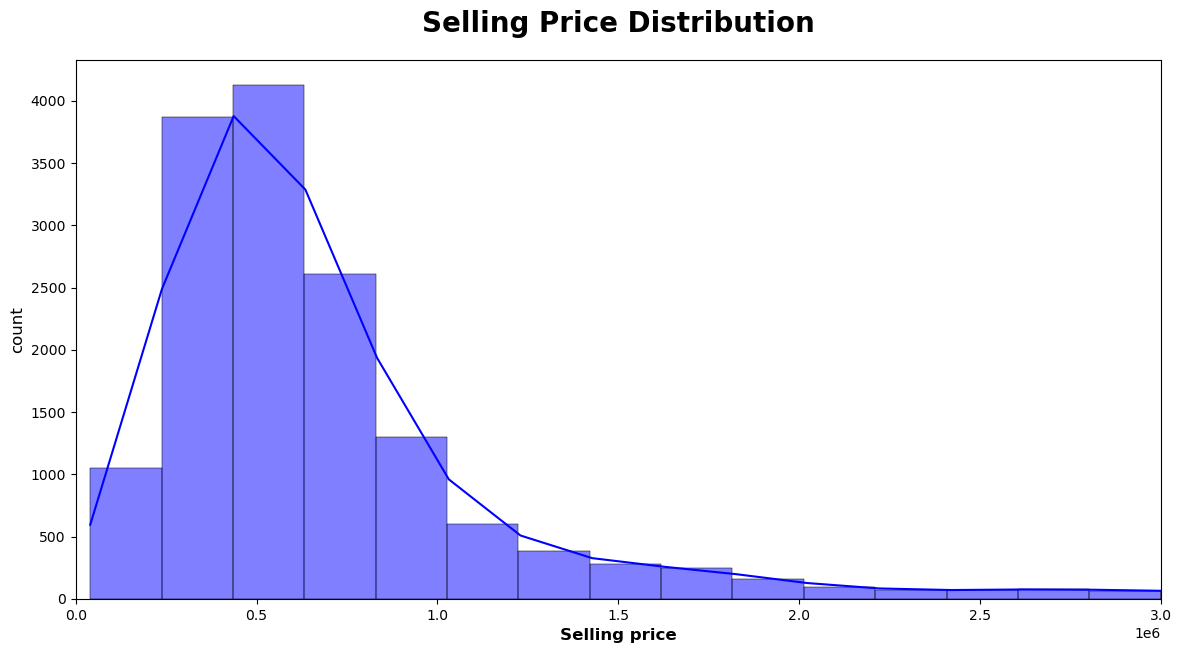

In [54]:
plt.subplots(figsize=(14,7))
sns.histplot(df.selling_price, bins=200, kde=True, color='b')
plt.title('Selling Price Distribution', fontsize=20,weight='bold',pad=20)
plt.ylabel('count',fontsize=12)
plt.xlabel('Selling price',weight='bold',fontsize=12)
plt.xlim(0,3000000)
plt.show()

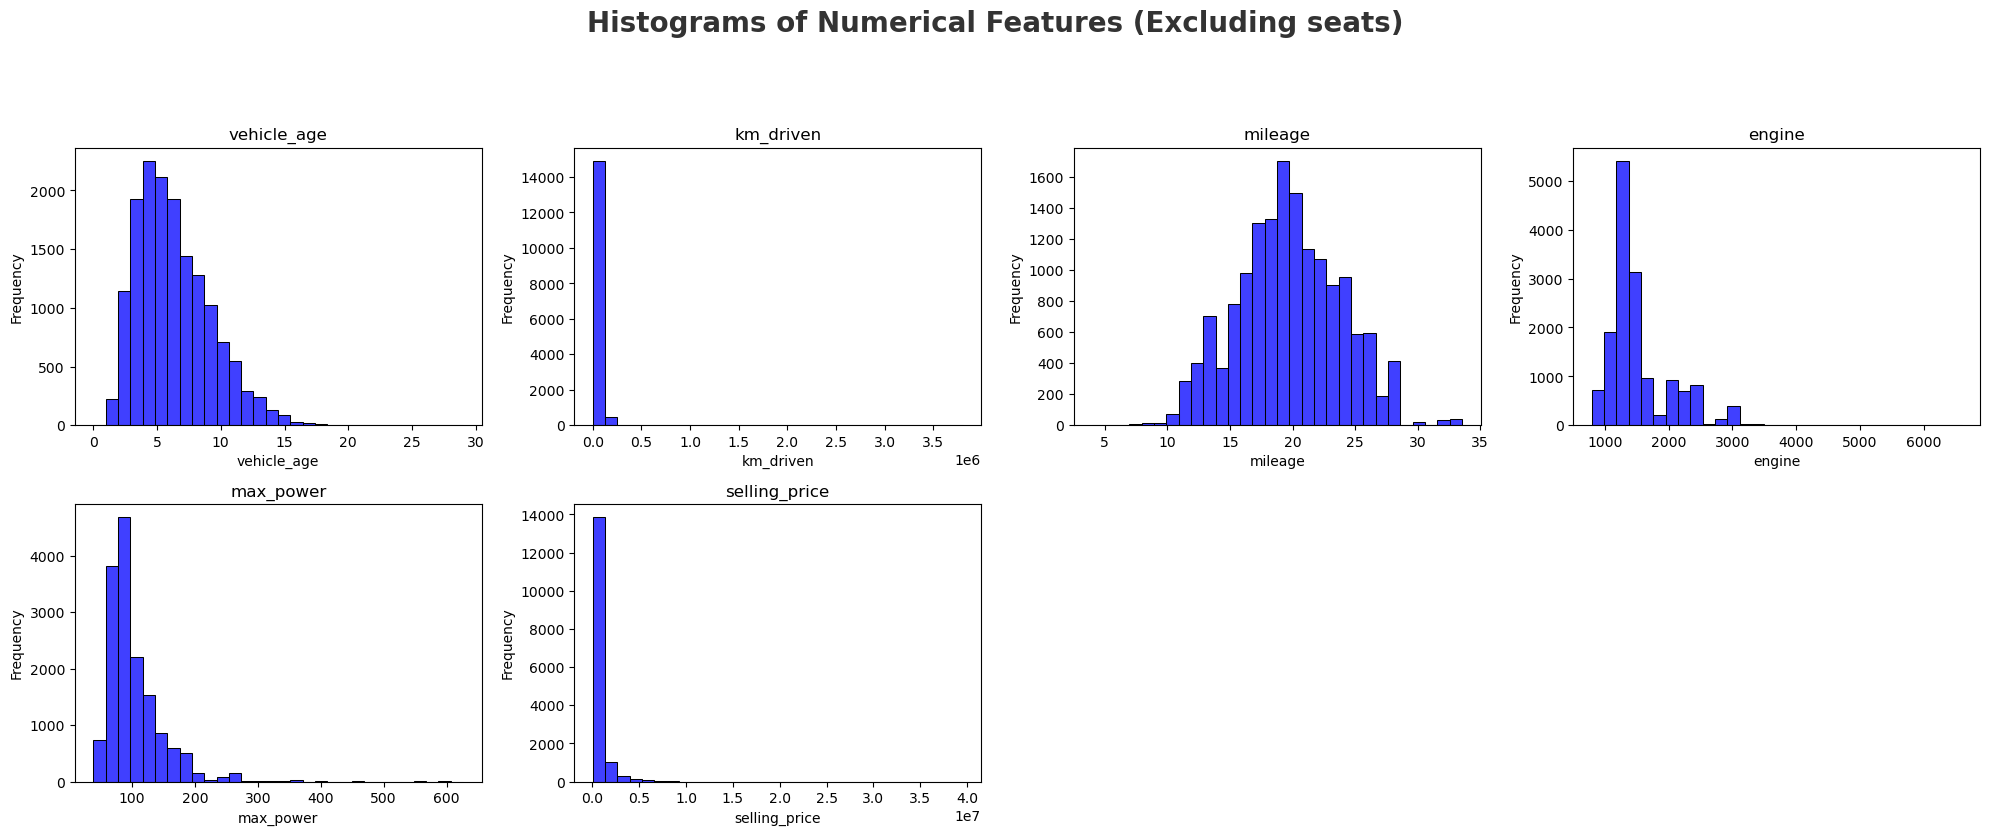

In [55]:
# Plot histograms for numerical features excluding 'seats'
plt.figure(figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features (Excluding seats)', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

# Exclude the 'seats' column
num_df_excluding_seats = num_df.drop(columns=['seats'])

for i, col in enumerate(num_df_excluding_seats.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], bins=30, color='b')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [60]:
skewness = num_df.skew()
print(skewness)

vehicle_age       0.833712
km_driven        28.172711
mileage           0.104961
engine            1.666467
max_power         2.485129
seats             2.039983
selling_price    10.047048
dtype: float64


#### Vehicle Age:
* Moderately positively skewed
* Most vehicles are between 0-10 years old
* Few vehicles are over 20 years old
#### KM Driven:
* Highly positively skewed (long right tail)
* Most cars have driven between 0-100,000 km
* Few extreme values up to 3,800,000 km
#### Mileage:
* Approximately symmetric distribution
* Most vehicles have mileage between 15-25
* Centered around 19.7
#### Engine:
* Highly positively skewed
* Most engines are between 1000-2000 cc
* Few high-powered engines above 3000 cc
#### Max Power:
* Highly positively skewed
* Most cars have power between 50-150
* Few high-performance vehicles with power > 300
#### Seats:
* Highly positively skewed
* Most cars have 5 seats
* Few vehicles with 7-9 seats
#### Selling Price:
* Highly positively skewed (very long right tail)
* Most cars priced between 100,000-1,000,000
* Few luxury vehicles with very high prices
#### Key Patterns:

*Most numerical features show positive skewness*

*Price, km_driven, and max_power show the most extreme skewness*

*Only mileage shows a relatively normal distribution*

*Seats show a discrete distribution as expected*

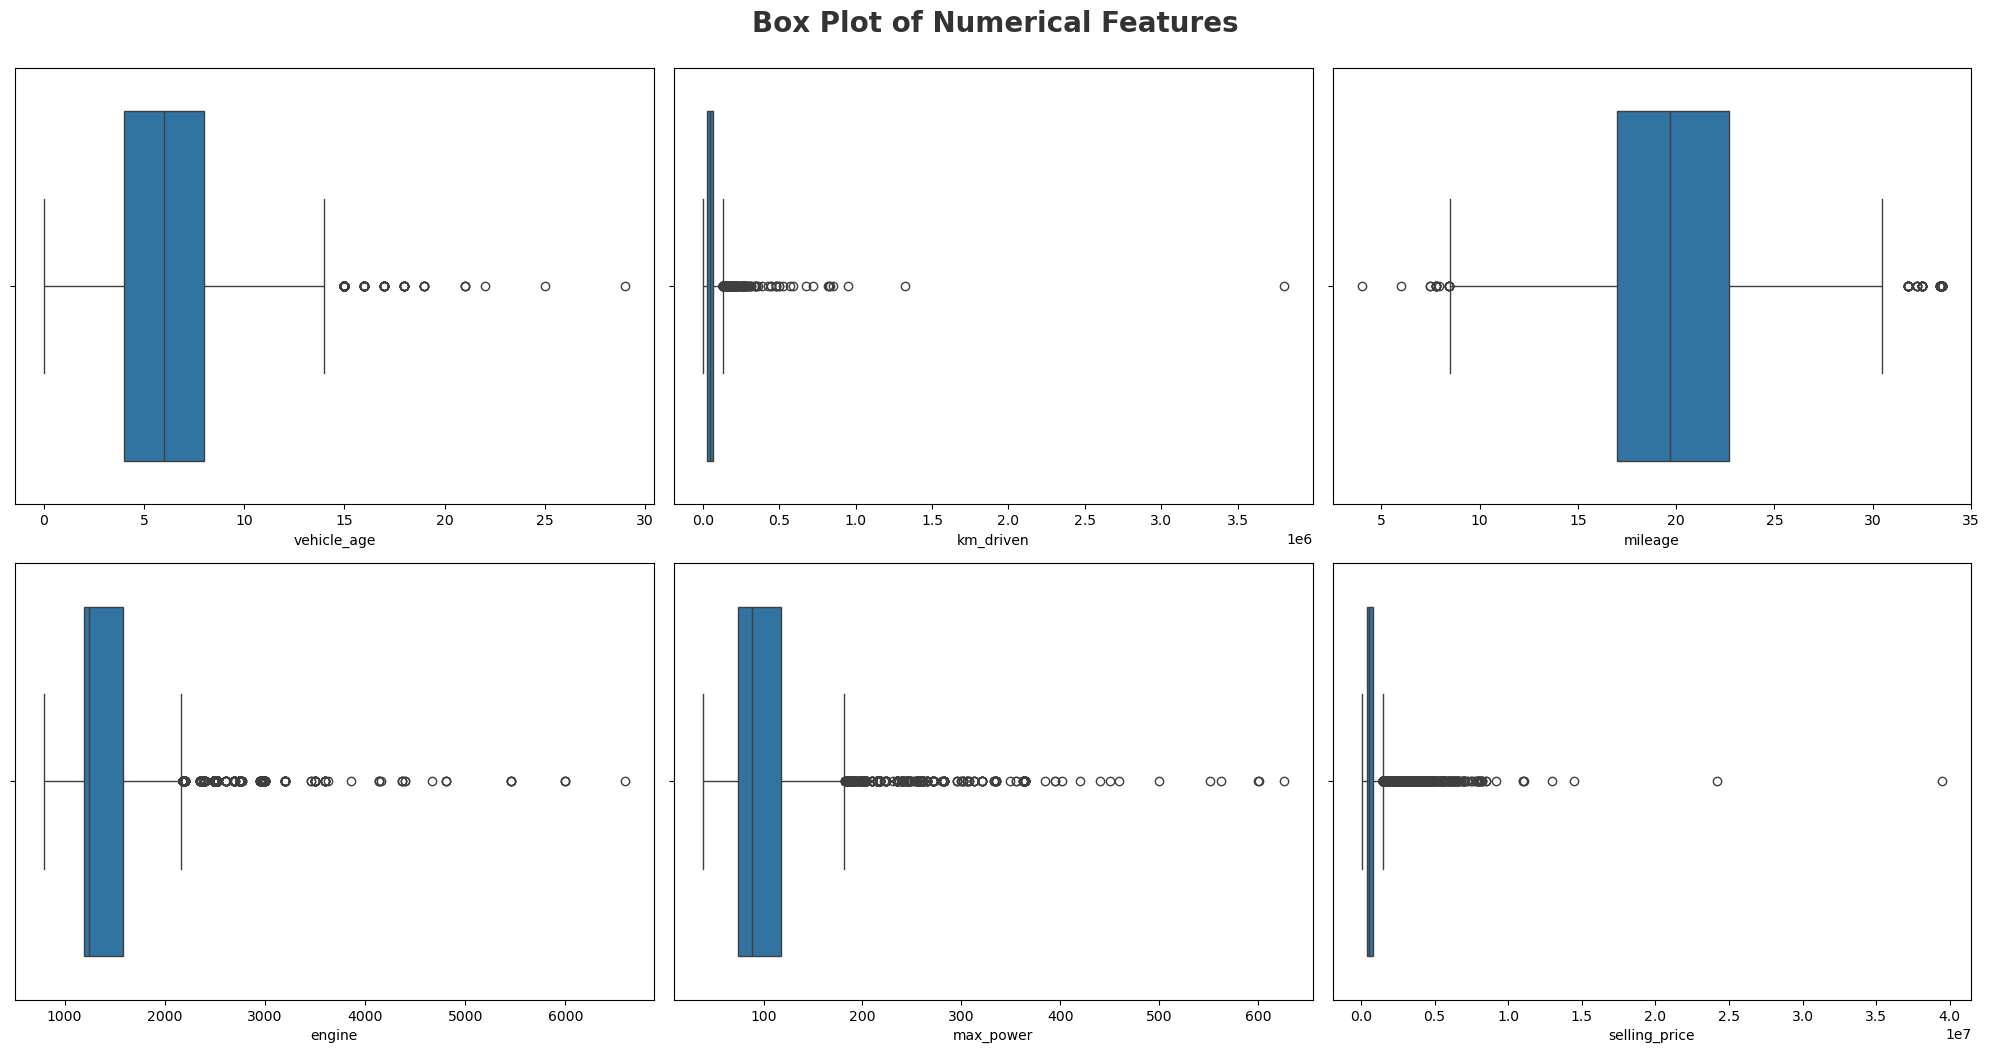

In [62]:
# Exclude the 'seats' column
num_df_filtered = num_df.drop(columns=['seats'])

plt.figure(figsize=(20, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(num_df_filtered.columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[num_df_filtered.columns[i]])
    plt.xlabel(num_df_filtered.columns[i])
    plt.tight_layout()

plt.show()


Outliers in km_driven, enginer, selling_price, and max power.

Categorical Features

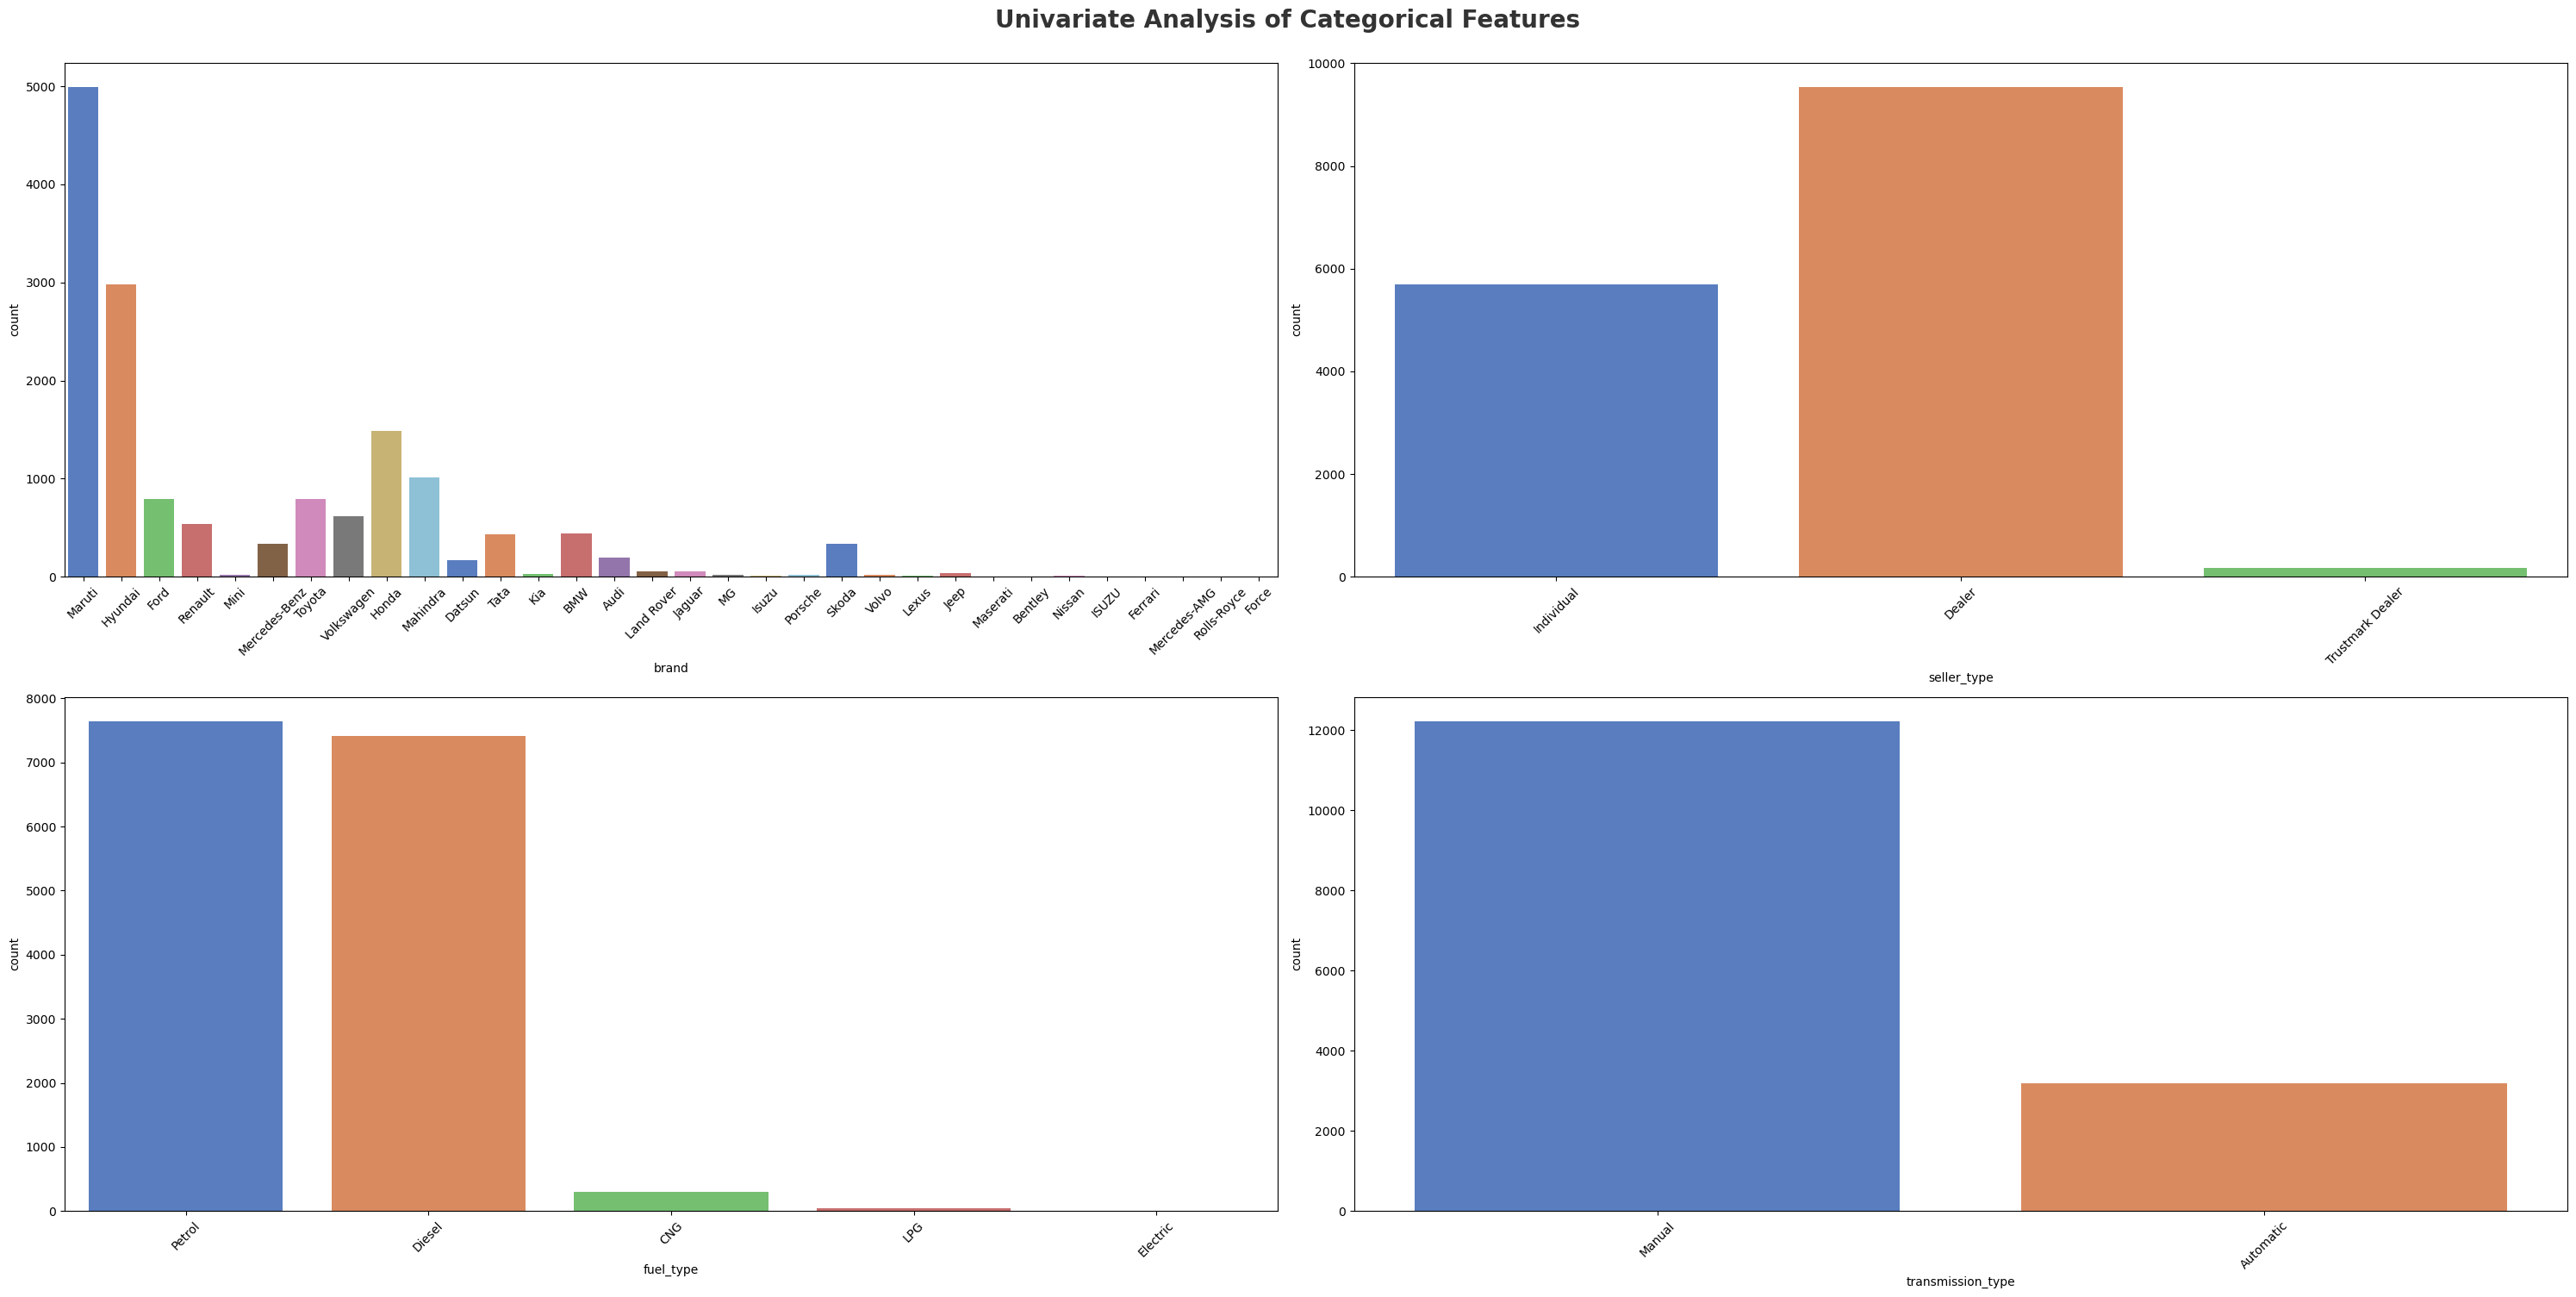

In [65]:
plt.figure(figsize=(30,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20,fontweight='bold', alpha=0.8, y=1.0)
cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0,len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]], palette= 'muted')
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

#### Listing out Top 10 vehicles that dominate CarDekho's sales charts

In [67]:
df.car_name.value_counts().head(10)

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

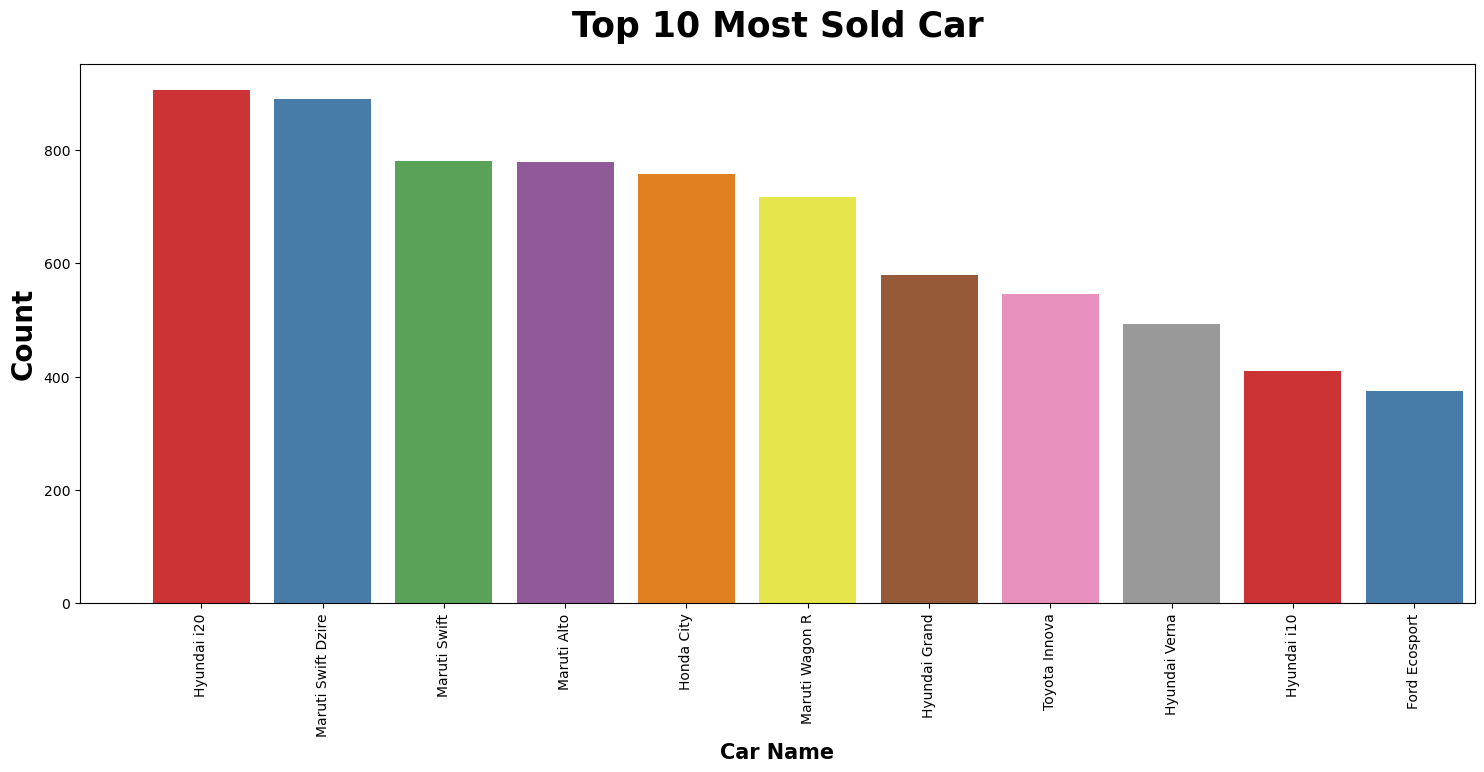

In [68]:
plt.subplots(figsize=(18,7))
sns.countplot(x='car_name',palette="Set1", data=df,order=df['car_name'].value_counts().index)
#value_counts().index: order the bars based on the count of occurrences of each car name
plt.title("Top 10 Most Sold Car", weight = 'bold', fontsize=25,pad=20)
plt.ylabel('Count',weight='bold',fontsize=20)
plt.xlabel('Car Name',weight='bold',fontsize=15)
plt.xticks(rotation=90)
plt.xlim(-1,10.5)
plt.show()

Check mean price of Hyundai i20 which is most sold

In [76]:
i20 = df[df['car_name'] == 'Hyundai i20']['selling_price'].mean()
print(f'The mean price of  Hyundai i20 is {i20:.2f} Rupees')

The mean price of  Hyundai i20 is 543603.75 Rupees


**Inference**
- As per the Chart these are top 10 most selling cars in used car website.
- Of the total cars sold Hyundai i20 shares 5.8% of total ads posted and followed by Maruti Swift Dzire.
- Mean Price of Most Sold Car is 5.4 lakhs.
- This Feature has impact on the Target Variable.

## Top 10 car brands that experience the highest sales on CarDekho

In [79]:
df.brand.value_counts().head(10)

brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

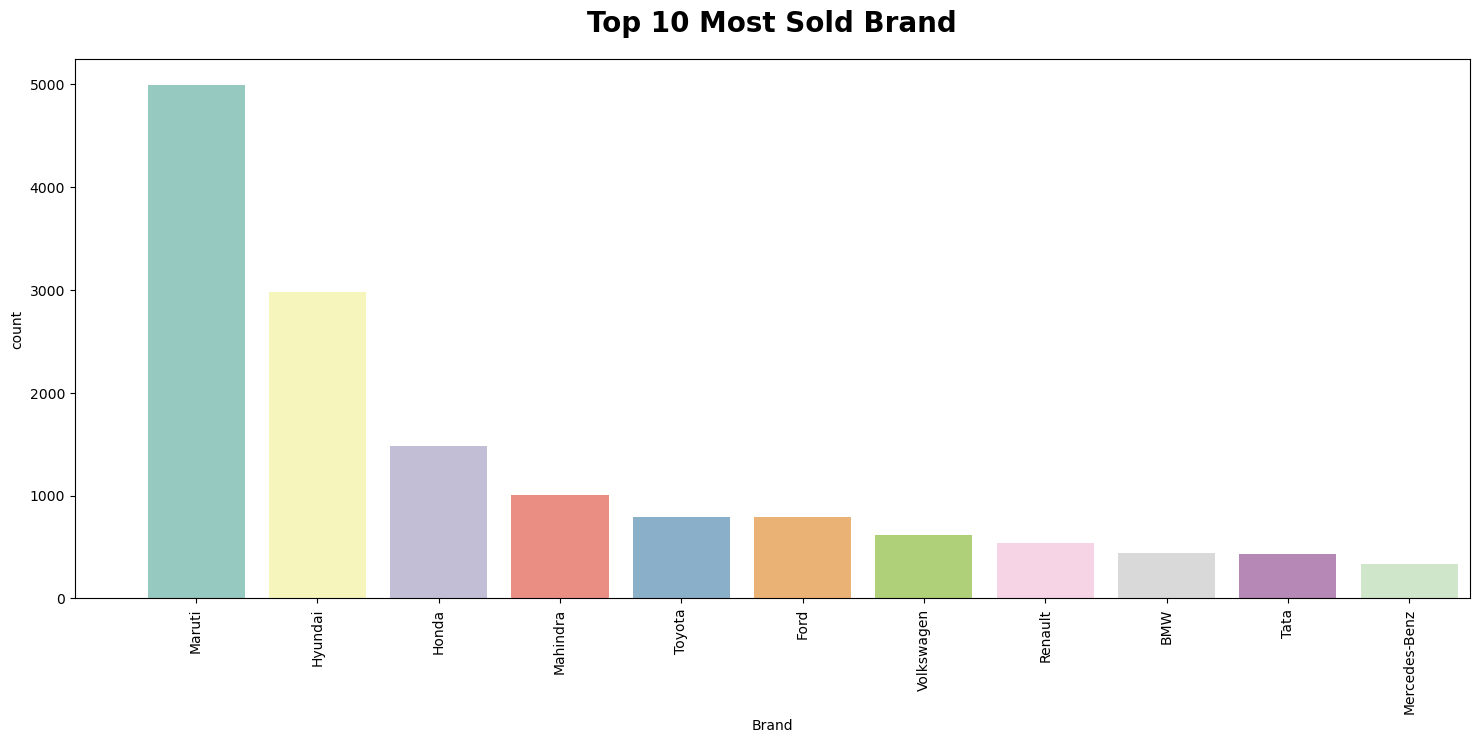

In [80]:
plt.subplots(figsize=(18,7))
sns.countplot(x='brand', data=df,palette="Set3", order = df['brand'].value_counts().index)
plt.title('Top 10 Most Sold Brand', weight='bold',fontsize=20,pad=20)
plt.ylabel('count')
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.xlim(-1,10.5)
plt.show()


Outcome - Maruti is most seliing brand on cardekho

Check the Mean price of Maruti brand which is most sold

In [82]:
maruti = df[df['brand'] == 'Maruti']['selling_price'].mean()
print(f'The mean price of Maruti is {maruti:.2f} rupees')

The mean price of Maruti is 487089.32 rupees


**Inference**
* As per the Chart Maruti has the most share of Ads in Used car website and Maruti is the most sold brand.
* Following Maruti we have Hyundai and Honda.
* Mean Price of Maruti Brand is 4.8 lakhs.

### Bivariate Analysis

In [86]:
continuous_features=[feature for feature in num_df if len(df[feature].unique())>=10]
print('Num of continuos features:',continuous_features)

Num of continuos features: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


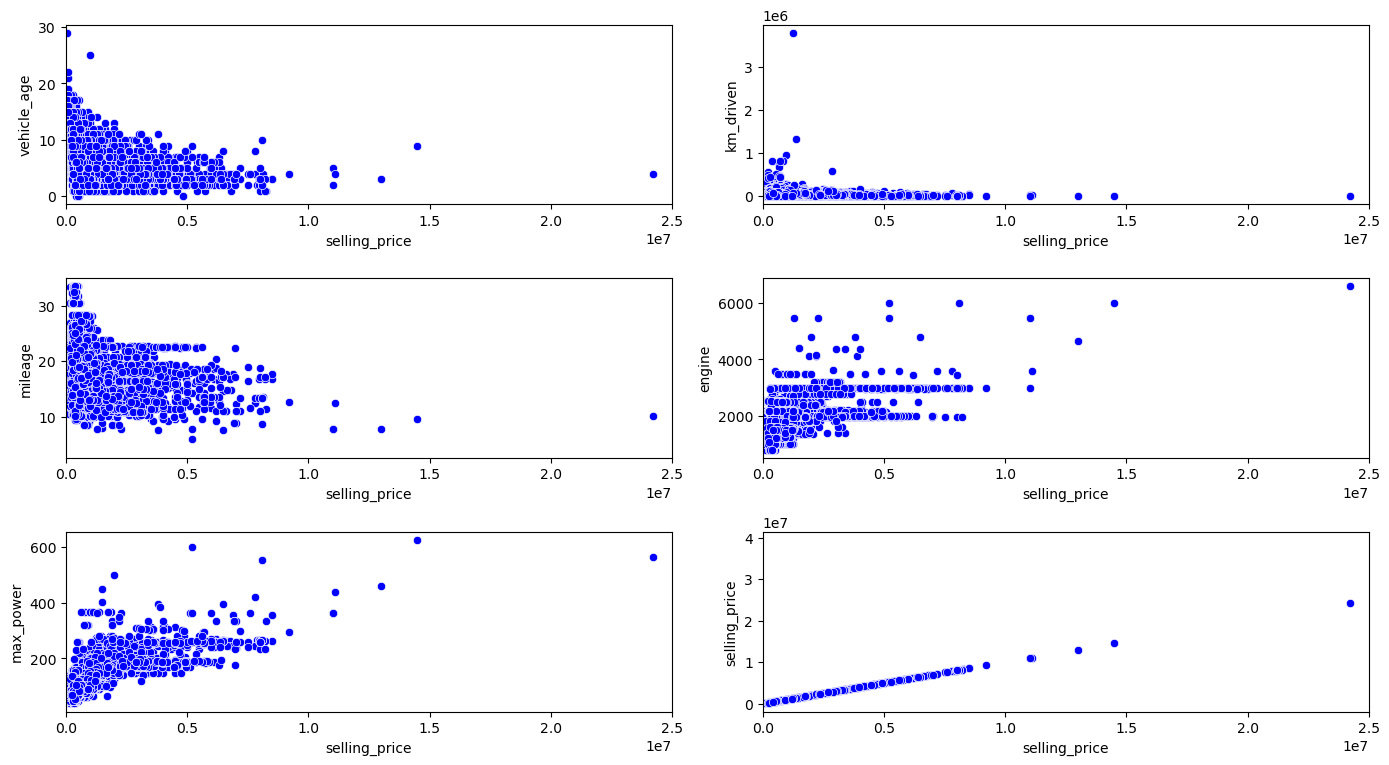

In [87]:
fig = plt.figure(figsize=(14, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=continuous_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    
plt.tight_layout()
plt.show()

**Inference**
* Lower Vehicle age has more selling price than Vehicle with more age.
* Engine CC has positive effect on price,Vehicle with 2000 cc and below are mostly priced below 5lakh.
* Kms Driven has negative effect on selling price

### Costlier Brand on CarDekho Website

In [90]:
brand = df.groupby('brand').selling_price.max()
brand = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]
print('-'*50)
print('Top 10 Costlier Brands on CarDekho Website')
print('-'*50)
brand

--------------------------------------------------
Top 10 Costlier Brands on CarDekho Website
--------------------------------------------------


,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


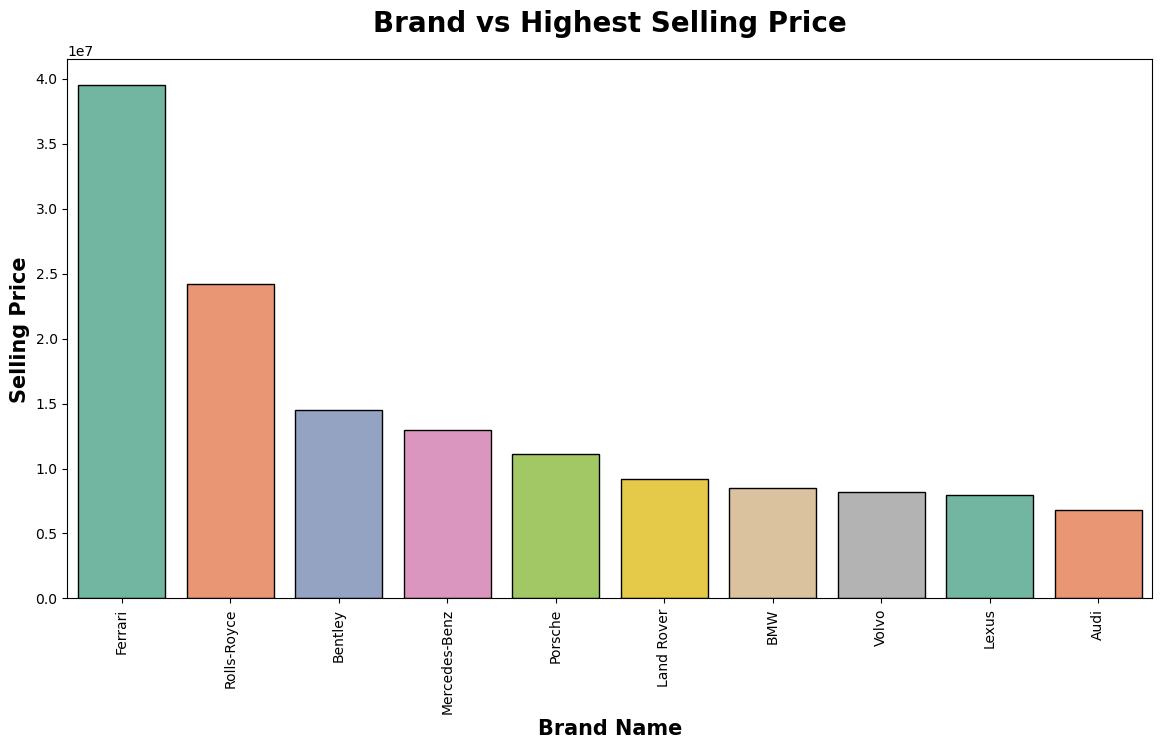

In [91]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y =brand.selling_price, ec='black',palette='Set2')
plt.title('Brand vs Highest Selling Price',weight='bold',fontsize=20,pad=20)
plt.xlabel('Brand Name',weight='bold',fontsize=15)
plt.ylabel('Selling Price', weight='bold', fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Inference**
* Costliest Brand sold is Ferrari at 3.95 Crores.
* Second most car Brand is Rolls-Royce as 2.42 Crores.
* Brand name has very clear impact on selling price

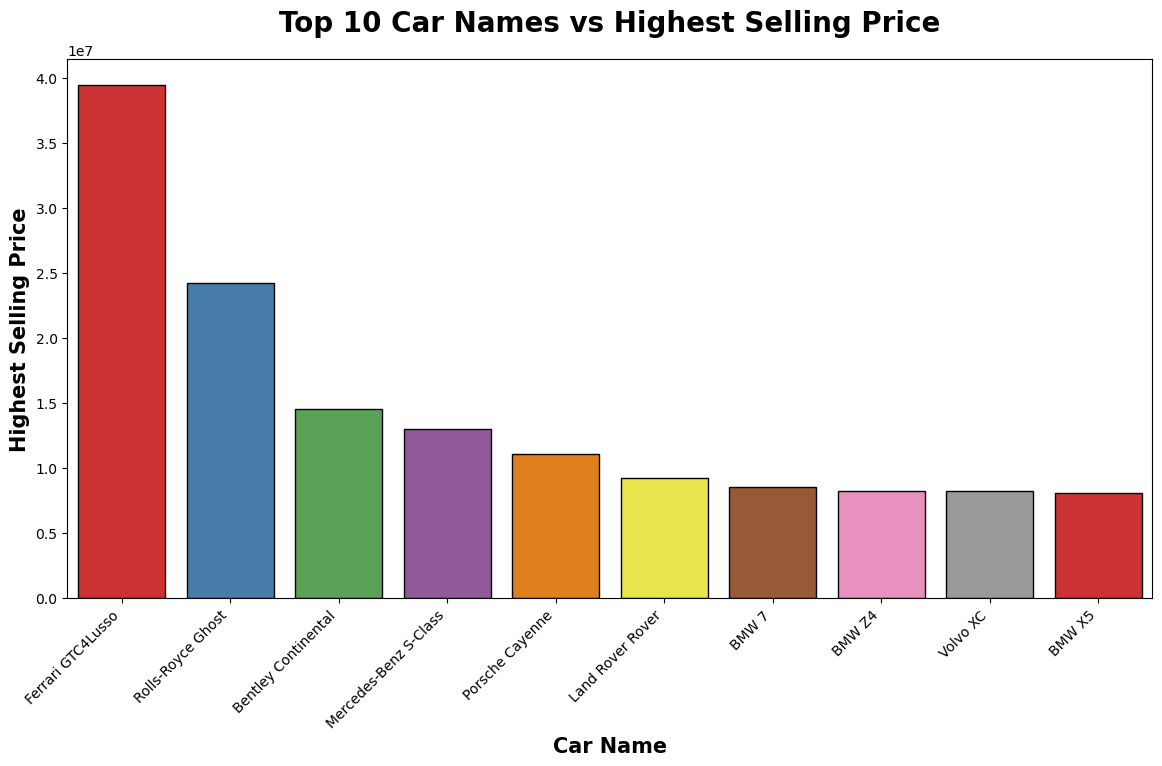

In [94]:

# Group by car name to get the highest selling price and sort the results
top_cars = df.groupby('car_name')['selling_price'].max().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x=top_cars.index, y=top_cars.values, palette='Set1', edgecolor='black')
plt.title('Top 10 Car Names vs Highest Selling Price', weight='bold', fontsize=20, pad=20)
plt.xlabel('Car Name', weight='bold', fontsize=15)
plt.ylabel('Highest Selling Price', weight='bold', fontsize=15)
plt.xticks(rotation=45, ha='right')  # Rotate for better readability

plt.show()


**Inference**
- Costliest Car sold is Ferrari GTC4 Lusso followed by Rolls Royce Ghost.
- Ferrari selling price is 3.95 Crs.
- Other than Ferrari other car has priced below 1.5cr.

#### Most Mileage Car Brand on CarDekho Website

In [97]:
mileage = df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)

print('-'*50)
print('Most Mileage Car Brand on CarDekho Website')
print('-'*50)
mileage.to_frame()

--------------------------------------------------
Most Mileage Car Brand on CarDekho Website
--------------------------------------------------


,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


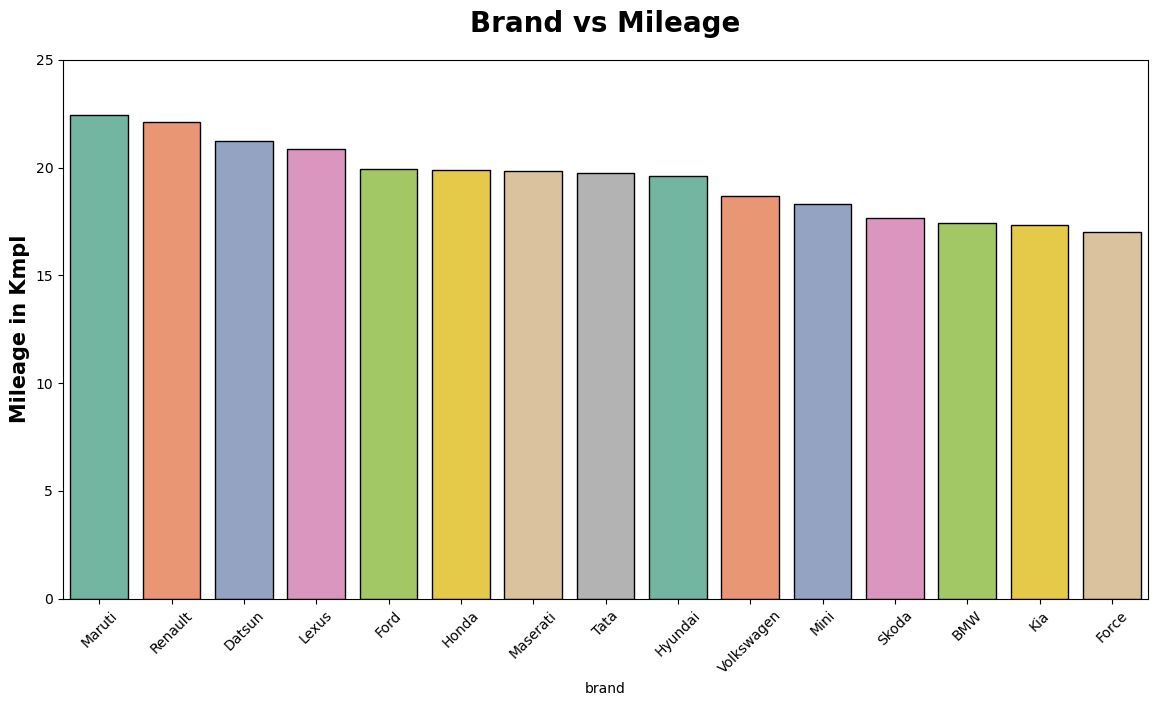

In [98]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index,y=mileage.values,ec='black',palette='Set2')
plt.title('Brand vs Mileage', weight='bold',fontsize=20,pad=20)
plt.ylabel('Mileage in Kmpl', weight='bold',fontsize=15)
plt.ylim(0,25)
plt.xticks(rotation=45)
plt.show()

#### Most Mileage Car on CarDekho Website

In [100]:
mileage_car = df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)

print('-'*50)
print('Most Mileage Car on CarDekho Website')
print('-'*50)

mileage_car.to_frame()

--------------------------------------------------
Most Mileage Car on CarDekho Website
--------------------------------------------------


,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


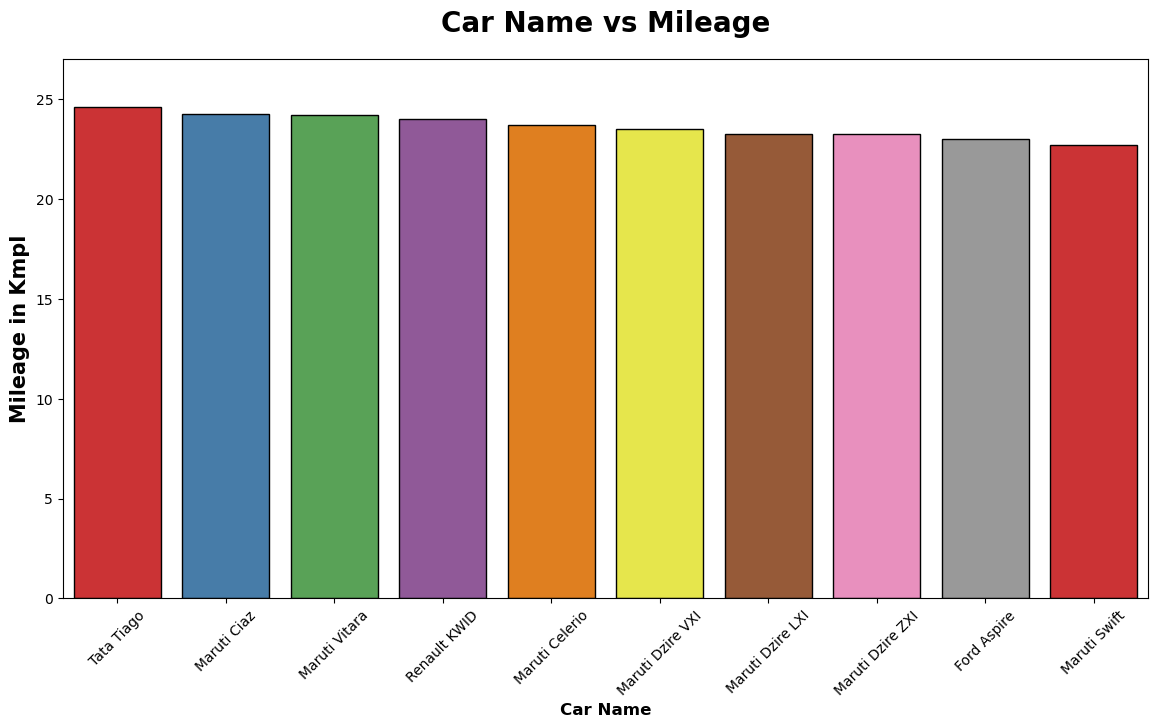

In [101]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage_car.index, y=mileage_car.values, ec='black',palette='Set1')
plt.title('Car Name vs Mileage', weight='bold',fontsize=20,pad=20)
plt.ylabel('Mileage in Kmpl',weight='bold',fontsize=15)
plt.xlabel('Car Name',weight='bold',fontsize=12)
plt.ylim(0,27)
plt.xticks(rotation=45)
plt.show()

#### Kilometers Driven Vs Selling Price

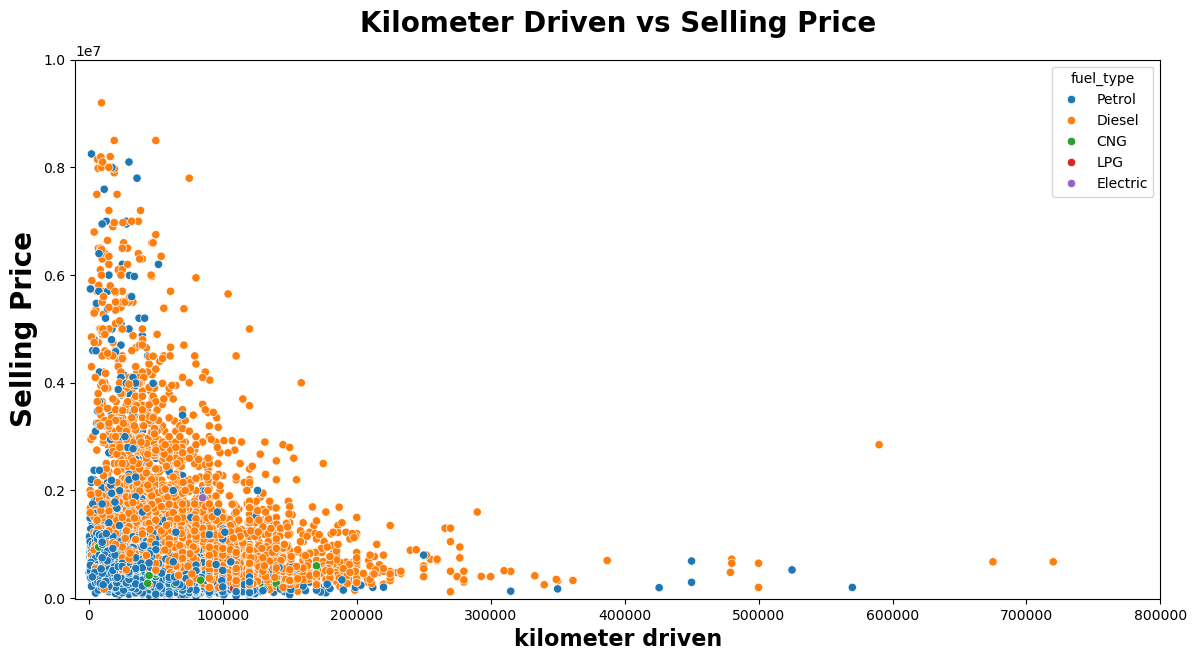

In [104]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x='km_driven',y='selling_price',data=df,ec='white',color='b',hue='fuel_type')
plt.title('Kilometer Driven vs Selling Price',weight='bold',fontsize=20,pad=20)
plt.ylabel('Selling Price',weight='bold',fontsize=20)
plt.xlim(-10000,800000)#used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel('kilometer driven',weight='bold',fontsize=16)
plt.show()

**Inference**
* Many Cars were sold with kms between 0 to 20k Kilometers
* Low Kms driven cars had more selling price compared to cars which had more kms driven.

#### Fuel Type Vs Selling Price

In [107]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


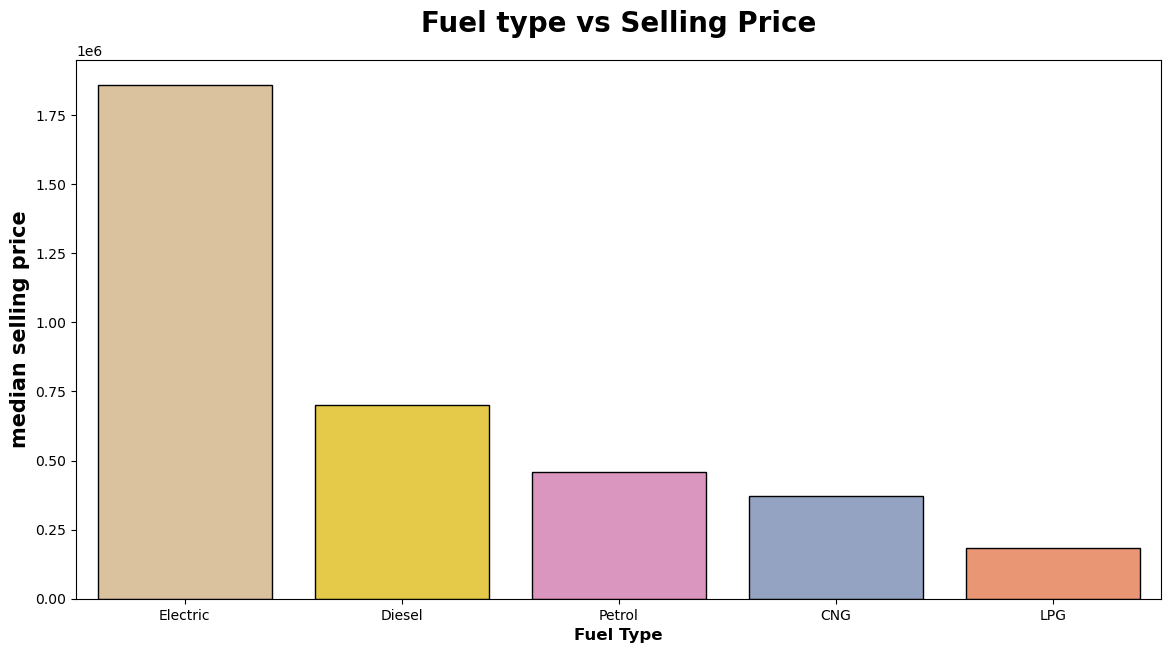

In [108]:
plt.subplots(figsize=(14,7))
sns.barplot(x=fuel.index,y=fuel.values,ec='black',palette='Set2_r')
plt.title('Fuel type vs Selling Price',weight='bold',fontsize=20,pad=20)
plt.ylabel('median selling price',weight='bold',fontsize=15)
plt.xlabel('Fuel Type',weight='bold',fontsize=12)
plt.show()

**Inference**
* Electric cars have highers selling average price.
* Followed by Diesel and Petrol.
* Fuel Type is also important feature for the Target variable.

#### Fuel Type Vs Mileage

In [111]:
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


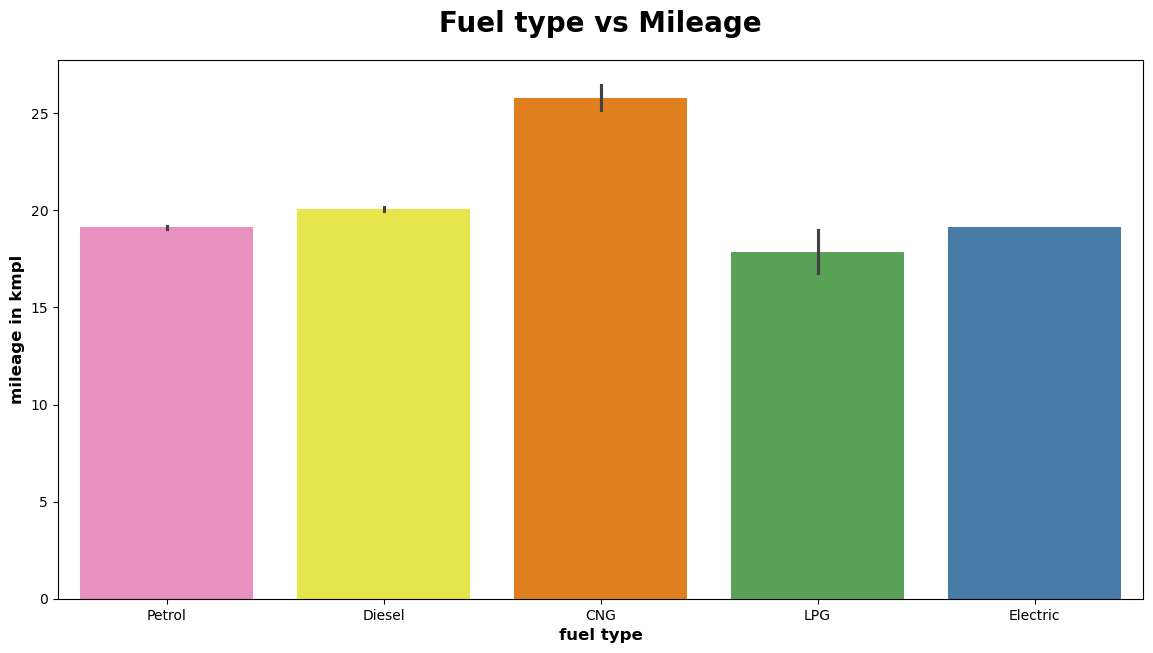

In [115]:
plt.subplots(figsize=(14,7))
sns.barplot(x='fuel_type',y='mileage',data=df,palette='Set1_r')
plt.title("Fuel type vs Mileage",weight='bold',fontsize=20,pad=20)
plt.ylabel('mileage in kmpl',weight='bold',fontsize=12)
plt.xlabel('fuel type',weight='bold',fontsize=12)
plt.show()

#### Mileage vs Selling Price

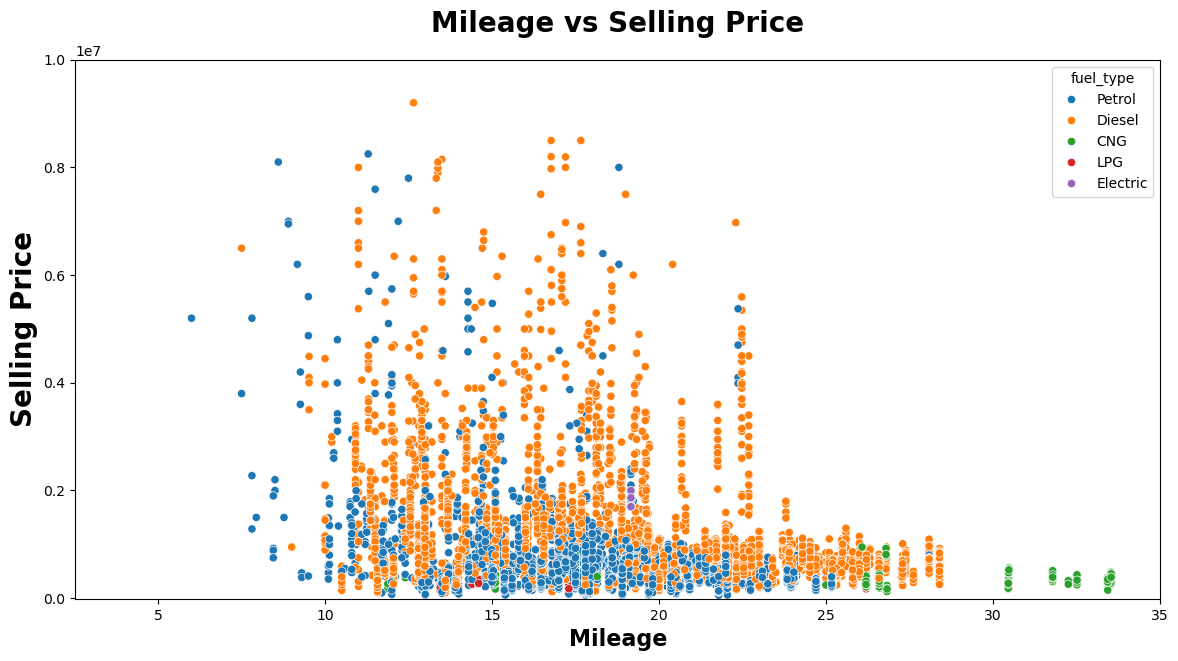

In [117]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="mileage", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,10000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

#### Vehicle Age vs Selling Price

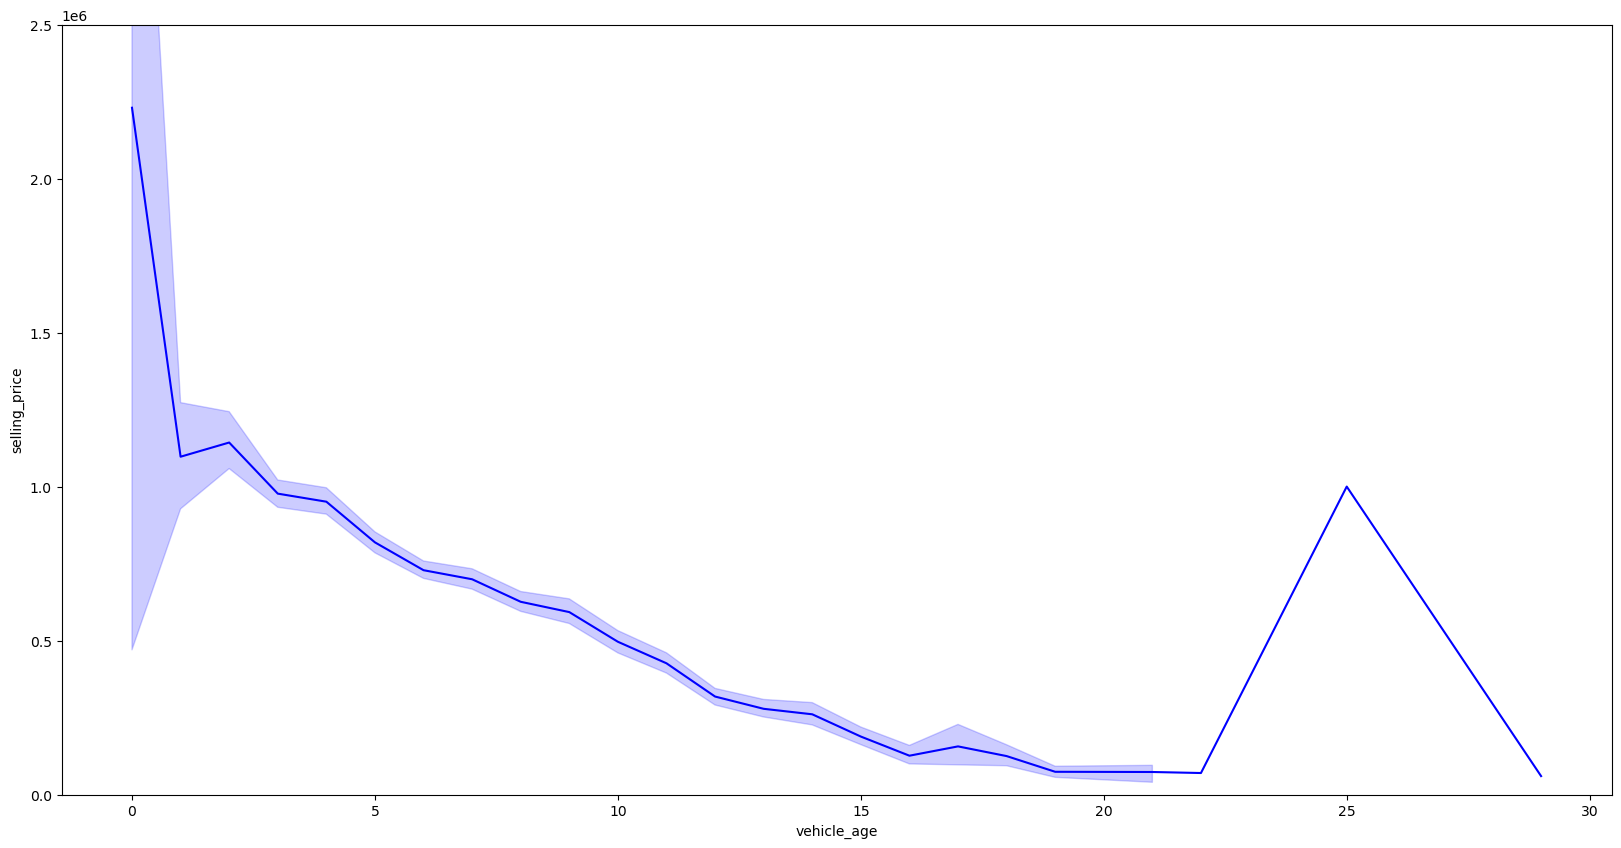

In [119]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()

**Inference**
* As the Vehicle age increases the price also get reduced.
* Vehicle age has Negative impact on selling price

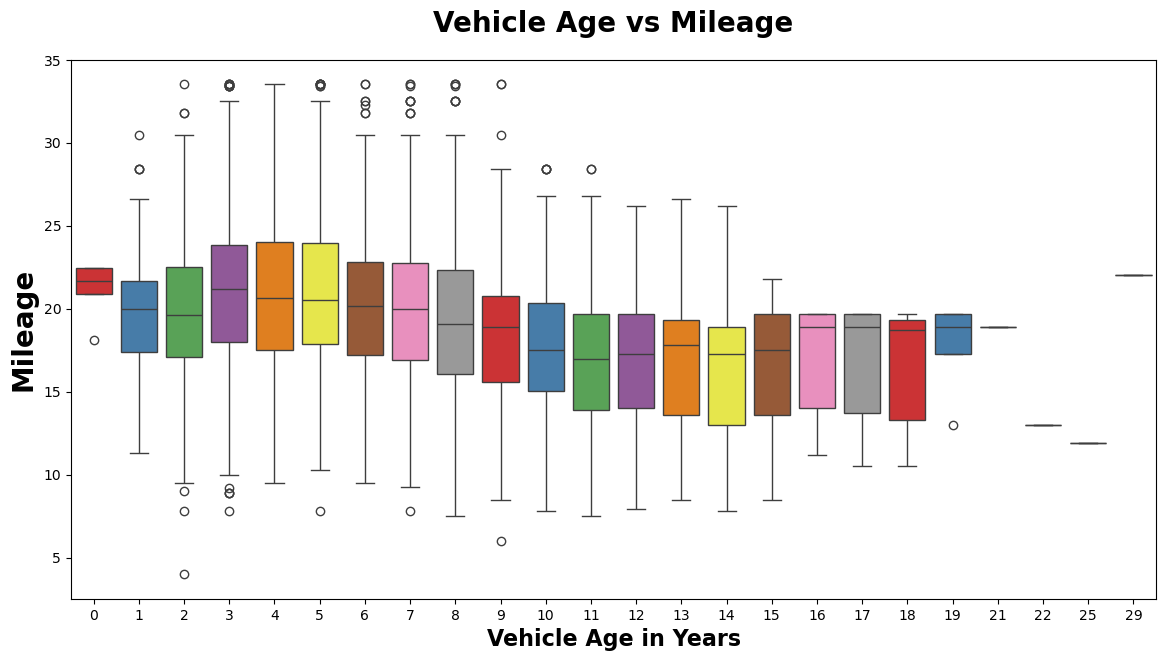

In [121]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df.vehicle_age, y= df.mileage, palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

**Inference**
* As the Age of vehicle increases the median of mileage drops.
* Newer Vehicles have more mileage median older vehicle.

In [123]:
oldest = df.groupby('car_name')['vehicle_age'].max().sort_values(ascending=False).head(10)
oldest.to_frame()

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Bolero,18
Mahindra Scorpio,18
Skoda Octavia,18
Honda CR-V,17
Mercedes-Benz E-Class,17


**Inference**
* Maruti Alto is the Oldest car available 29 years old in the used car website followed  by BMW 3 for 25 years old.

#### Transmission Type Vs Selling Price

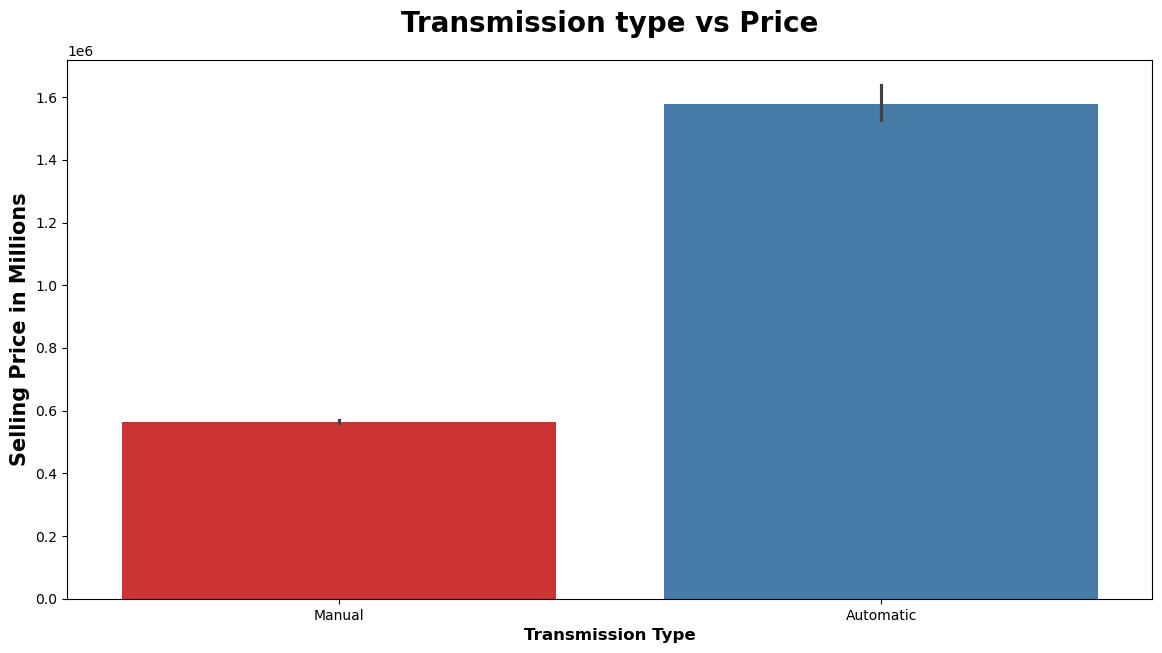

In [126]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission_type',y='selling_price',data=df,palette='Set1')
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

**Inference**
* Manual Transmission was found in most of the cars which was sold.
* Automatic cars have more selling price than manual cars.

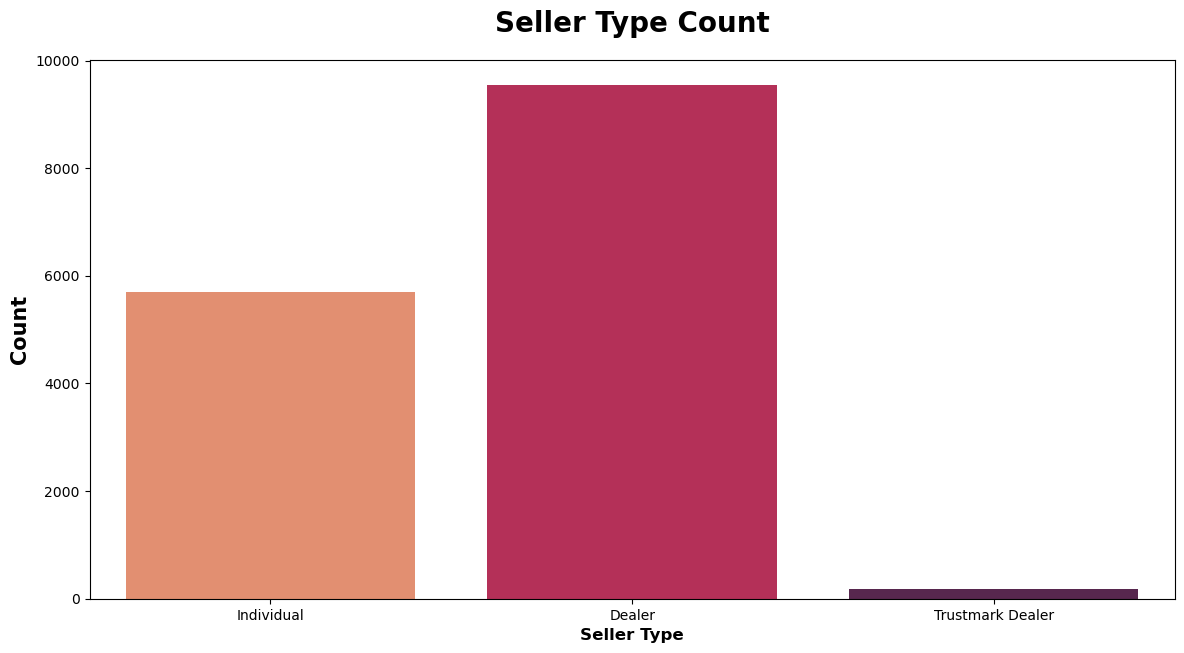

In [128]:
plt.subplots(figsize=(14,7))
sns.countplot(x='seller_type', data=df,palette="rocket_r")
plt.title("Seller Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Seller Type", weight="bold", fontsize=12)
plt.show() 

#### Seller Type vs Selling Price

In [130]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


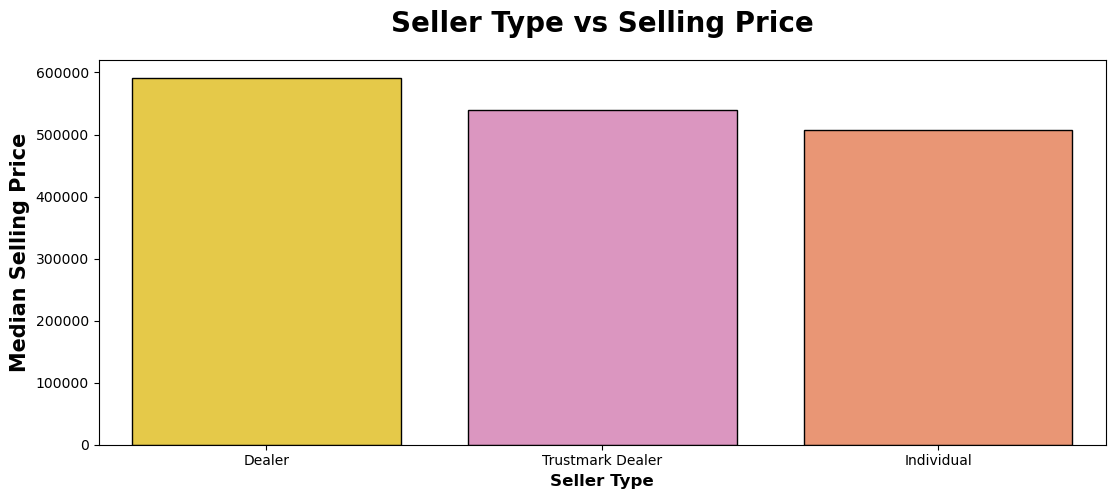

In [131]:
plt.subplots(figsize=(13,5))
sns.barplot(x=dealer.index, y=dealer.values, ec = "black", palette="Set2_r")
plt.title("Seller Type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Seller Type", weight="bold", fontsize=12)
plt.show()

**Inference**
* Dealers have put more ads on used car website.
* Dealers have put 9539 ads with median selling price of 5.91 Lakhs.
* Followed by Individual with 5699 ads with median selling price of 5.4 Lakhs.
* Dealers have more median selling price than Individual.

#### Multivariate Analysis

In [134]:
df[num_df.columns].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.031938,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192897,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.442200,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.552778,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172812,0.750236
seats,0.031938,0.192897,-0.442200,0.552778,0.172812,1.000000,0.115231
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115231,1.000000


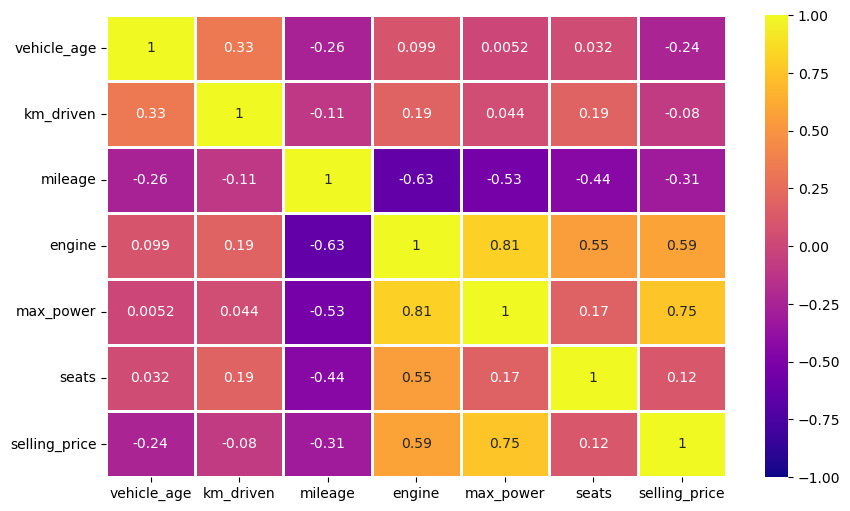

In [135]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df[num_df.columns].corr(),annot=True,cmap='plasma',vmin=-1,vmax=1,linecolor='white',linewidths=2)
plt.show()

**Inference**
* Max Power and Engine are highly correlated

## Final Report
* The datatypes and Column names were right and there was 15411 rows and 13 columns
* The selling_price column is the target to predict. i.e Regression Problem.
* There are outliers in the km_driven, enginer, selling_price, and max power.
* Dealers are the highest sellers of the used cars.
* Skewness is found in few of the columns will check it after handling outliers.
* Vehicle age has negative impact on the price.
* Manual cars are mostly sold and automatic has higher selling average than manual cars.
* Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.
* We just need less data cleaning for this dataset.

# Feature Engineering

In [139]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


#### Removing Unnecessary Features
**Dropping 'brand' and 'model'**

The features `'brand'` and `'model'` are being dropped because they are redundant when combined into the `'car_name'` feature. The `'car_name'` already encapsulates both the brand and model of the car, so keeping them separately would introduce unnecessary complexity. By dropping these individual features and keeping only the `'car_name'`, we simplify the model while still retaining the relevant information. This helps create a model that is more efficient and less prone to overfitting.


### Creating Feature Matrix (Independent Variables) & Target Variable (Dependent Variable)

In [142]:

from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Converting Categorical Columns into Numerical
**Using OneHotEncoder in Pipeline**

We are using a **Pipeline** to streamline the process of converting categorical variables into numerical values. Specifically, we apply **OneHotEncoder** within the pipeline to automatically encode the categorical columns into numerical format. This technique transforms categorical features into binary columns, each representing one of the possible categories. By including the encoding step within the pipeline, we ensure that it is applied consistently to the training and testing data, without manually handling it outside the model. This helps in simplifying the workflow and avoiding data leakage.


In [146]:
from sklearn import set_config
#Categorical encoded pipeline
categorical_transformer = Pipeline([("onehotenc",OneHotEncoder(sparse_output = False,drop='first'))])
set_config(display = 'diagram')
categorical_transformer

Pipeline(steps=[('onehotenc',
                 OneHotEncoder(drop='first', sparse_output=False))])

In [147]:
df.drop(['brand','model'], axis=1)

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Creating new variables for numerical attributes/columns
numeric_features = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power']

# StandardScaler for 'km_driven' and passthrough for others
numeric_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), ['km_driven']),  # Apply Standard Scaling only on 'km_driven'
        ('passthrough', 'passthrough', ['vehicle_age', 'mileage', 'engine', 'max_power'])  # Passthrough for other numerical features
    ])

# Creating new variables for categorical attributes/columns
categorical_features = ['car_name', 'seller_type', 'fuel_type', 'transmission_type', 'seats']

# Making pipeline for encoding categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating new variable for these numerical & categorical features pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [149]:


X = df[numeric_features+categorical_features]
y = df['selling_price']

In [150]:
# Saving the cleaned data
X.to_csv('clean_data.csv')

In [151]:
# Splitting the dataset for training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
# Let us check shape of the training & test set
print(X_train.shape, y_test.shape)

(12328, 10) (3083,)


# Model Building & Evaluation

## Linear Regression

In [156]:
linear_reg = Pipeline(steps=[('preprocessor', preprocessor), ('linear_regressor', LinearRegression())])

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse)))
print(('The r2_score using Linear Regression :{}'.format(linear_reg_r2_score)))

The Mean Squared Error using Linear Regression :155401447505.33197
The Root Mean Squared Error using Linear Regression :394209.9028504129
The r2_score using Linear Regression :0.7935637531752991


## Decison Tree

In [158]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                      ('decision_tree_regressor', DecisionTreeRegressor())])
decision_tree.fit(X_train, y_train)
# Predicting the model
y_pred1 = decision_tree.predict(X_test)
# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred)
decision_tree_rmse = mean_squared_error(y_test, y_pred1, squared=False)
decision_tree_r2_score = r2_score(y_test, y_pred1)

print("The Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_mse))
print("The Root Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_rmse))
print("The r2_score using Decision Tree Regressor : {}".format(decision_tree_r2_score))

The Mean Squared Error using Decision Tree Regressor : 155401447505.33197
The Root Mean Squared Error using Decision Tree Regressor : 286231.59269535984
The r2_score using Decision Tree Regressor : 0.8911656396412928


# Random Forest

In [160]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('random_forest_regressor', RandomForestRegressor())])
random_forest_reg.fit(X_train, y_train)                        

# Predicting the model
y_pred2 = random_forest_reg.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The Root Mean Squared Error using Random Forest Regressor : {}".format(random_forest_rmse))
print("The r2_score Error using Random Forest Regressor : {}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 48368652958.965195
The Root Mean Squared Error using Random Forest Regressor : 219928.74518571963
The r2_score Error using Random Forest Regressor : 0.9357467813774859


In [161]:
y_train_pred2 = random_forest_reg.predict(X_train)
random_forest_train_mse = mean_squared_error(y_train, y_train_pred2)
random_forest_train_rmse = mean_squared_error(y_train, y_train_pred2, squared=False)
random_forest_train_r2_score = r2_score(y_train, y_train_pred2)

# Printing Performance Metrics for Training Set
print("Model Performance for Training Set")
print(f"- Mean Squared Error: {random_forest_train_mse:.4f}")
print(f"- Root Mean Squared Error: {random_forest_train_rmse:.4f}")
print(f"- R² Score: {random_forest_train_r2_score:.4f}")

Model Performance for Training Set
- Mean Squared Error: 18748515026.7076
- Root Mean Squared Error: 136925.2169
- R² Score: 0.9769


## Random Forest with Hyperparamter Tuning

In [164]:
# Define the RandomForestRegressor with best hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=50,  # Best n_estimators found
    max_depth=None,    # Best max_depth found
    min_samples_split=2,  # Best min_samples_split found
    min_samples_leaf=1,   # Best min_samples_leaf found
    max_features='sqrt',  # Best max_features found
    random_state=42
)

# Define the pipeline with preprocessor and the updated Random Forest model
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming 'preprocessor' is already defined
    ('random_forest_regressor', rf_model)  # RandomForest with updated hyperparameters
])

pipe.fit(X_train, y_train)                        

# Predicting the model
y_train_pred3 = pipe.predict(X_train)
y_test_pred3 = pipe.predict(X_test)

# Evaluation Metrics
rf_pipe_mse = mean_squared_error(y_test, y_test_pred3)
rf_pipe_rmse = mean_squared_error(y_test, y_test_pred3, squared=False)
rf_pipe_score = r2_score(y_test, y_test_pred3)

print("The Mean Squared Error using Random Forest Regressor : {}".format(rf_pipe_mse))
print("The Root Mean Squared Error using Random Forest Regressor : {}".format(rf_pipe_rmse))
print("The r2_score Error using Random Forest Regressor : {}".format(rf_pipe_score))

The Mean Squared Error using Random Forest Regressor : 43454328157.27046
The Root Mean Squared Error using Random Forest Regressor : 208457.0175294429
The r2_score Error using Random Forest Regressor : 0.9422750009277228


In [165]:
rf_pipe_train_mse = mean_squared_error(y_train, y_train_pred3)
rf_pipe_train_rmse = mean_squared_error(y_train, y_train_pred3, squared=False)
rf_pipe_train_r2_score = r2_score(y_train, y_train_pred3)

# Output the performance for Training and Test sets
print("Random Forest Regressor Performance after Hyper Tuning")
print("Model performance for Training set")
print(f"- Root Mean Squared Error: {rf_pipe_train_mse:.4f}")
print(f"- Mean Absolute Error: {rf_pipe_train_rmse:.4f}")
print(f"- R2 Score: {rf_pipe_train_r2_score:.4f}")

Random Forest Regressor Performance after Hyper Tuning
Model performance for Training set
- Root Mean Squared Error: 23684057440.5103
- Mean Absolute Error: 153896.2554
- R2 Score: 0.9708


# Advanced Models

## GradientBoostingRegressor

In [169]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('gradient_boosting' , GradientBoostingRegressor())])

gradient_boosting_reg.fit(X_train, y_train)

# Predicting the model
y_train_pred4 = pipe.predict(X_train)
y_test_pred4 = pipe.predict(X_test)

# Evaluation Metrics
gb_mse = mean_squared_error(y_test, y_test_pred4)
gb_rmse = mean_squared_error(y_test, y_test_pred4, squared=False)
gb_score = r2_score(y_test, y_test_pred3)



print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gb_mse))
print("The Root Mean Squared Error using Gradient Boosting Regressor : {}".format(gb_rmse))
print("The r2_sccore using Gradient Boosting Regressor : {}".format(gb_score))

The Mean Squared Error using Gradient Boosting Regressor : 43454328157.27046
The Root Mean Squared Error using Gradient Boosting Regressor : 208457.0175294429
The r2_sccore using Gradient Boosting Regressor : 0.9422750009277228


In [199]:
gb_train_mse = mean_squared_error(y_train, y_train_pred4)
gb_train_rmse = mean_squared_error(y_train, y_train_pred4, squared=False)
gb_train_r2_score = r2_score(y_train, y_train_pred4)

# Output the performance for Training and Test sets
print("Gradient Boosting Performance")
print("Model performance for Training set")
print(f"- Root Mean Squared Error: {gb_train_mse:.4f}")
print(f"- Mean Absolute Error: {gb_train_rmse:.4f}")
print(f"- R2 Score: {gb_train_r2_score:.4f}")
print("----------------------------------")


Gradient Boosting Performance
Model performance for Training set
- Root Mean Squared Error: 23684057440.5103
- Mean Absolute Error: 153896.2554
- R2 Score: 0.9708
----------------------------------


## XGBRegressor

In [209]:
!pip install xgboost

  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-win_amd64.whl (124.9 MB)


In [211]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb_reg = Pipeline(steps=[('preprocessor', preprocessor),
                ('xgb', xgb.XGBRegressor())])

xgb_reg.fit(X_train, y_train)

# Predicting the moodel
y_pred5 = xgb_reg.predict(X_test)

# Evaluation Metrics
xgb_reg_mse = mean_squared_error(y_test, y_pred5)
xgb_reg_rmse = mean_squared_error(y_test, y_pred5, squared=False)
xgb_reg_r2_score = r2_score(y_test, y_pred5)

print("The mean square error using XGBoost is {}".format(xgb_reg_mse))
print("The root mean_squared error using XGBoost is {}".format(xgb_reg_rmse))
print("The r2 score using XGBoost is {}".format(xgb_reg_r2_score))

The mean square error using XGBoost is 62200964589.484856
The root mean_squared error using XGBoost is 249401.21208503548
The r2 score using XGBoost is 0.9173718690872192


In [213]:
xgb_train_mse = mean_squared_error(y_train, y_train_pred4)
xgb_train_rmse = mean_squared_error(y_train, y_train_pred4, squared=False)
xgb_train_r2_score = r2_score(y_train, y_train_pred4)

# Output the performance for Training and Test sets
print("Model performance for Training set")
print(f"- Root Mean Squared Error: {xgb_train_mse:.4f}")
print(f"- Mean Absolute Error: {xgb_train_rmse:.4f}")
print(f"- R2 Score: {xgb_train_r2_score:.4f}")
print("----------------------------------")

Model performance for Training set
- Root Mean Squared Error: 23684057440.5103
- Mean Absolute Error: 153896.2554
- R2 Score: 0.9708
----------------------------------


In [215]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest',
               'Gradient Boosting', 'XGBoost'],
    'RMSE' : [linear_reg_rmse, decision_tree_rmse, random_forest_rmse,
            gb_rmse, xgb_reg_rmse],
    'r2_score' : [linear_reg_r2_score, decision_tree_r2_score, random_forest_r2_score, 
    gb_score, xgb_reg_r2_score]
})

models.sort_values(by='RMSE', ascending=True)

,Model,RMSE,r2_score
3,Gradient Boosting,208457.017529,0.942275
2,Random Forest,219928.745186,0.935747
4,XGBoost,249401.212085,0.917372
1,Decision Tree,286231.592695,0.891166
0,Linear Regression,394209.902850,0.793564


From the above observation we can say that the performance (RMSE & R-sqaured) of Gradient boosting model is good as compared to other models. So we will save Gradient boosting model for further testing of the data using pickle library.

In [221]:
# Saving the model pipeline correctly
import pickle

pickle.dump(gradient_boosting_reg, open('gradient_boosting_regressor_model.pkl', 'wb'))

#### Conclusion:
- The **Gradient Boosting Regressor** is the final selected model for this task, as it yields the best performance based on the **RMSE** and **R2 score**. With an **RMSE** of 208,457.02 and an **R2 score** of 0.9423, it demonstrates the highest predictive accuracy among all models.
- Other models such as **Random Forest** and **XGBoost** showed competitive performance, but Gradient Boosting provided the most balanced results across both training and testing sets.
- The **Linear Regression** and **Decision Tree** models performed the least, with relatively high **RMSE** and lower **R2 scores**.

Thus, **Gradient Boosting Regressor** is the best choice for predicting the target variable in this dataset.